# Obyčejné diferenciální rovnice (ODR) II

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

- ODR $N$-tého řádu převádíme na soustavu $N$ diferenciálních rovnic 1. řádu
- Potřebujeme  $N$ počátečních podmínek
- Řešení se liší v závislosti na počátečních podmínkách:
    1. **Počáteční problém**: všechny podmínky **jsou** zadány v jednom bodě (Cvičení 10)
    2. **Okrajový problém**: všechny podmínky **nejsou** zadány v jednom bodě (Cvičení 11)
    

- **Příklad:**
 - Máme rovnici 2. řádu
$
y''(t)=-y(t)
$
 - Potřebujeme dvě počáteční podmínky:
    1. **Počáteční problém** (Cvičení 10)
    - všechny podmínky **jsou** zadány v jednom bodě $t_{0}$
    - $ y(t_{0})=y_{0} $ a $ y'(t_{0})=v_{0} $
    2. **Okrajový problém** (Cvičení 11)
    - všechny podmínky **nejsou** zadány v jednom bodě 
    - $ y(t_{0})=y_{0} $ a $ y(t_{1})=y_{1} $
    
    
## Metody řešení okrajových úloh:
1. Metoda střelby
2. Metoda sítí (konečných diferencí)
3. Variační metody

### Metoda střelby
- Úlohu převedeme na ekvivalentní úlohu počátečního problému (zvolíme si parametrickou počáteční podmínku v okrajovém bodě)
- Počáteční problém umíme vyřešit postupem uvedeným na Cvičení 10
- Zkontrolujeme, zda získané řešení splňuje okrajovou podmínku s dostatečnou přesností
- Pokud ne, postup opakujeme pro jinou hodnotu paramteru
- Pro zpřesňování parametru můžeme použít např. metodu půlení intervalu

<div class="alert alert-block alert-warning"><b>Cvičení 11.01: </b>Jaká má být počáteční rychlost $v_{0}$ meteorologické raketové sondy (ve vakuu), aby po 5 s byla ve výšce 50 m? [<a href="https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html">1</a>]</div>

- Řešíme úlohu $y''(t)=-g$, kde $g$ je gravitační konstanta (speciální případ [šikmého vrhu](https://en.wikipedia.org/wiki/Projectile_motion))
- Okrajové podmínky jsou $y(t=0)=0$ a $y(t=5)=50$, tj. podmínky jsou zadány v dvou různých okrajových bodech $t=0$ a $t=5$
- Postup:
    1. Zvolíme $v_{0}$, čímž úlohu převedeme na počáteční problém, neboť $v_{0}=y'(t=0)$
    2. Vypočítáme $y(t=5)$
    3. Pokud jsme netrefili zadanou okrajovou podmínku $y(t=5)=50$, opakujeme výpočet pro jinou hodnotu $y'(t=0)$

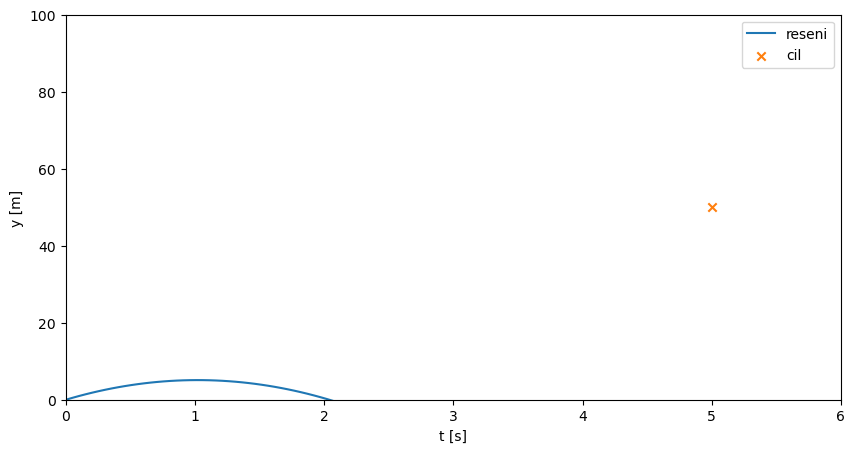

In [2]:
# vstupni matice pro reseni pocatecniho problemu - resime dve rovnice prvniho radu
def F(t,s):
    return np.dot(np.array([[0,1],[0,-9.81/s[1]]]),s)    

# prvni pocatecni podminka y(t=0)=0
y0 = 0

# odhad pocatecni rychlosti rakety
v0 = 10

# cas
t_rozsah = np.linspace(0, 5, 100)
# reseni pocatecniho problemu pomoci integrovane funkce solve_ivp() pro pocatecni podminky y0 a v0
# funkce vrati hodnoty promenne t a prislusna reseni: y = y[0], y'= y[1]
reseni = solve_ivp(F, [0, 5], [y0, v0], method='RK45', t_eval = t_rozsah)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(reseni.t, reseni.y[0],label='reseni')
ax.scatter(5, 50, marker='x',color='C1',label='cil')
ax.set_xlabel('t [s]')
ax.set_ylabel('y [m]')
ax.set_xlim(0,6)
ax.set_ylim(0,100)
ax.legend()

### Metoda sítí (konečných diferencí)
- [Příklad](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/09_ODE/DOCS/priklad_tridiagonalni_matice.pdf)